In [15]:
import pickle
import matplotlib.pylab as plt

In [18]:
with open("/export/share/krausef99dm/data/ptr_data/ptr_data.pkl", 'rb') as f:
    ordered_dict = pickle.load(f)

In [32]:
seq_lens_all = [len(ordered_dict[idx]["fasta"]) for idx in list(ordered_dict.keys())]  # can also add set inside of list()
# seq longer than 20k

SyntaxError: invalid syntax (3438760217.py, line 3)

In [36]:
seq_lens_all = [l for l in seq_lens_all if l < 15_000]
# count how many lost!

(array([ 761., 1381., 1866., 1532., 1263.,  998.,  829.,  605.,  473.,
         348.,  253.,  216.,  162.,  117.,  102.,   79.,   65.,   37.,
          38.,   33.,   25.,   20.,   12.,   17.,    8.,    6.,    5.,
           5.,    3.,    4.]),
 array([  303.        ,   958.53333333,  1614.06666667,  2269.6       ,
         2925.13333333,  3580.66666667,  4236.2       ,  4891.73333333,
         5547.26666667,  6202.8       ,  6858.33333333,  7513.86666667,
         8169.4       ,  8824.93333333,  9480.46666667, 10136.        ,
        10791.53333333, 11447.06666667, 12102.6       , 12758.13333333,
        13413.66666667, 14069.2       , 14724.73333333, 15380.26666667,
        16035.8       , 16691.33333333, 17346.86666667, 18002.4       ,
        18657.93333333, 19313.46666667, 19969.        ]),
 <BarContainer object of 30 artists>)

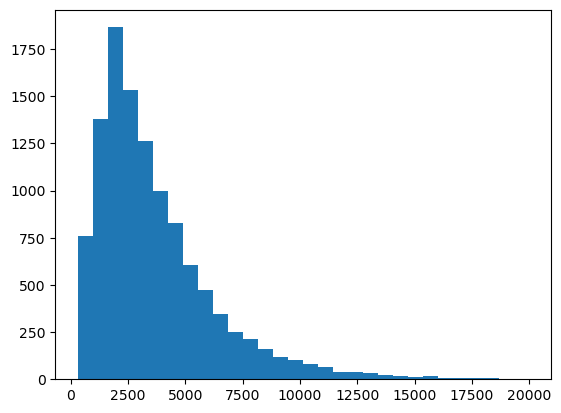

In [34]:
plt.hist(seq_lens_all, bins=30)

In [26]:
path_seq_train = "/export/share/krausef99dm/data/data_train/train_9.0k_data.pkl"
path_seq_val = "/export/share/krausef99dm/data/data_test/val_9.0k_data.pkl"
path_seq_test = "/export/share/krausef99dm/data/data_test/test_9.0k_data.pkl"

path_cod_train = "/export/share/krausef99dm/data/data_train/codon_train_2.7k_data.pkl"
path_cod_val = "/export/share/krausef99dm/data/data_test/codon_val_2.7k_data.pkl"
path_cod_test = "/export/share/krausef99dm/data/data_test/codon_test_2.7k_data.pkl"

In [27]:
def load_rna_data(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

def get_seq_lens(path):
    rna_data, _, _, _ = load_rna_data(path_seq_train)
    return [len(array) for array in rna_data]

In [28]:
seq_train = get_seq_lens(path_seq_train)
seq_val = get_seq_lens(path_seq_val)
seq_test = get_seq_lens(path_seq_test)

cod_train = get_seq_lens(path_cod_train) * 3
cod_val = get_seq_lens(path_cod_val) * 3
cod_test = get_seq_lens(path_cod_test) * 3

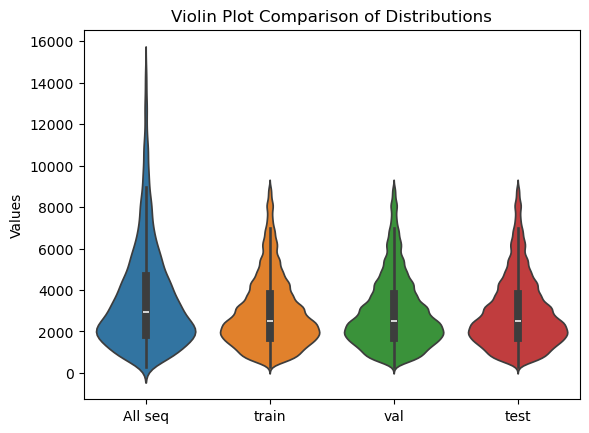

In [38]:
import seaborn as sns

data = [seq_lens_all, seq_train, seq_val, seq_test]
labels = ['All seq', 'train', 'val', "test"]
sns.violinplot(data=data)
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.title("Violin Plot Comparison of Distributions for nulceotide dataset")
plt.ylabel("Values")
plt.show()